<a href="https://colab.research.google.com/github/AeroEng16/FootballAnalysis/blob/main/SoccerNetData_HomographyEstimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
try:
  from SoccerNet.Downloader import SoccerNetDownloader
except ModuleNotFoundError:
  !pip install SoccerNet
  from SoccerNet.Downloader import SoccerNetDownloader
import os
from pathlib import Path
import zipfile
import json
from google.colab.patches import cv2_imshow
import cv2

In [ ]:
!git clone https://github.com/SoccerNet/SoccerNet-v3


fatal: destination path 'SoccerNet-v3' already exists and is not an empty directory.


In [ ]:
mySoccerNetDownloader = SoccerNetDownloader(LocalDirectory="SoccerNetData")

Path("SoccerNetData").mkdir(parents=True, exist_ok=True)

mySoccerNetDownloader.downloadGames(files=["Labels-v3.json", "Frames-v3.zip"], split=["train","valid","test"], task="frames") # download frames and labels for the 400 games of SN v3 - Requires around 60 GB of local storage

SoccerNetData/england_epl/2014-2015/2015-02-21 - 18-00 Chelsea 1 - 1 Burnley/Labels-v3.json already exists
SoccerNetData/england_epl/2014-2015/2015-02-21 - 18-00 Chelsea 1 - 1 Burnley/Frames-v3.zip already exists
SoccerNetData/england_epl/2014-2015/2015-02-21 - 18-00 Crystal Palace 1 - 2 Arsenal/Labels-v3.json already exists
SoccerNetData/england_epl/2014-2015/2015-02-21 - 18-00 Crystal Palace 1 - 2 Arsenal/Frames-v3.zip already exists
SoccerNetData/england_epl/2014-2015/2015-02-21 - 18-00 Swansea 2 - 1 Manchester United/Labels-v3.json already exists
SoccerNetData/england_epl/2014-2015/2015-02-21 - 18-00 Swansea 2 - 1 Manchester United/Frames-v3.zip already exists
SoccerNetData/england_epl/2014-2015/2015-02-22 - 19-15 Southampton 0 - 2 Liverpool/Labels-v3.json already exists
SoccerNetData/england_epl/2014-2015/2015-02-22 - 19-15 Southampton 0 - 2 Liverpool/Frames-v3.zip already exists
SoccerNetData/england_epl/2015-2016/2015-08-29 - 17-00 Chelsea 1 - 2 Crystal Palace/Labels-v3.json alr

KeyboardInterrupt: 

In [ ]:
mySoccerNetDownloader = SoccerNetDownloader(LocalDirectory="CalibrationData")

Path("CalibrationData").mkdir(parents=True, exist_ok=True)

mySoccerNetDownloader.downloadDataTask(task="calibration", split=["train","valid","test","challenge"])



  0%|          | 0.00/2.29G [00:00<?, ?iB/s]



























































































































































































































































































































































































































































































































































































































































































































































































































































































































































































KeyboardInterrupt: 

In [34]:
Path("/content/CalibrationData/calibration/test/").mkdir(parents=True, exist_ok=True)

!unzip "/content/CalibrationData/calibration/test.zip" -d "/content/CalibrationData/calibration/"

Streaming output truncated to the last 5000 lines.
  inflating: /content/CalibrationData/calibration/test/test/00219.jpg  
  inflating: /content/CalibrationData/calibration/test/test/00219.json  
  inflating: /content/CalibrationData/calibration/test/test/00220.jpg  
  inflating: /content/CalibrationData/calibration/test/test/00220.json  
  inflating: /content/CalibrationData/calibration/test/test/00221.jpg  
  inflating: /content/CalibrationData/calibration/test/test/00221.json  
  inflating: /content/CalibrationData/calibration/test/test/00222.jpg  
  inflating: /content/CalibrationData/calibration/test/test/00222.json  
  inflating: /content/CalibrationData/calibration/test/test/00223.jpg  
  inflating: /content/CalibrationData/calibration/test/test/00223.json  
  inflating: /content/CalibrationData/calibration/test/test/00224.jpg  
  inflating: /content/CalibrationData/calibration/test/test/00224.json  
  inflating: /content/CalibrationData/calibration/test/test/00225.jpg  
  infla

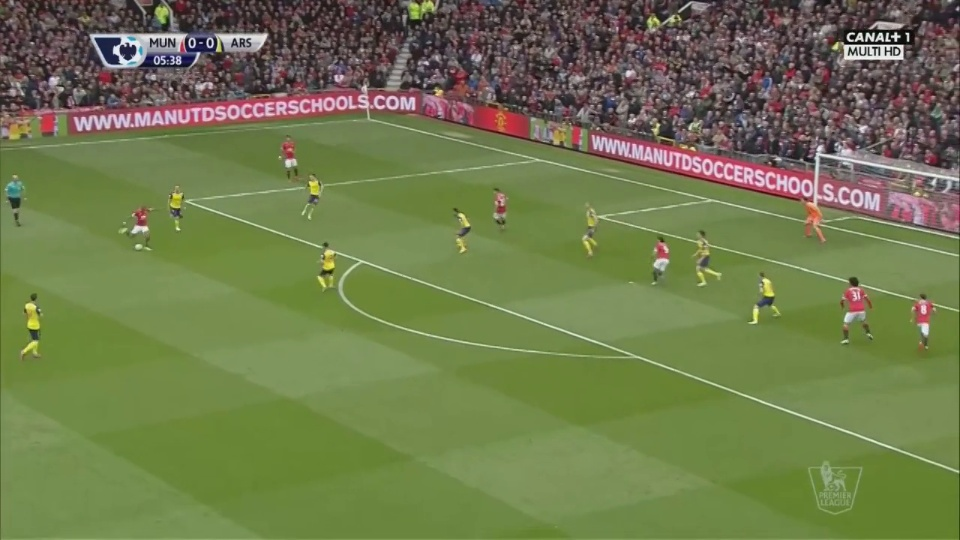

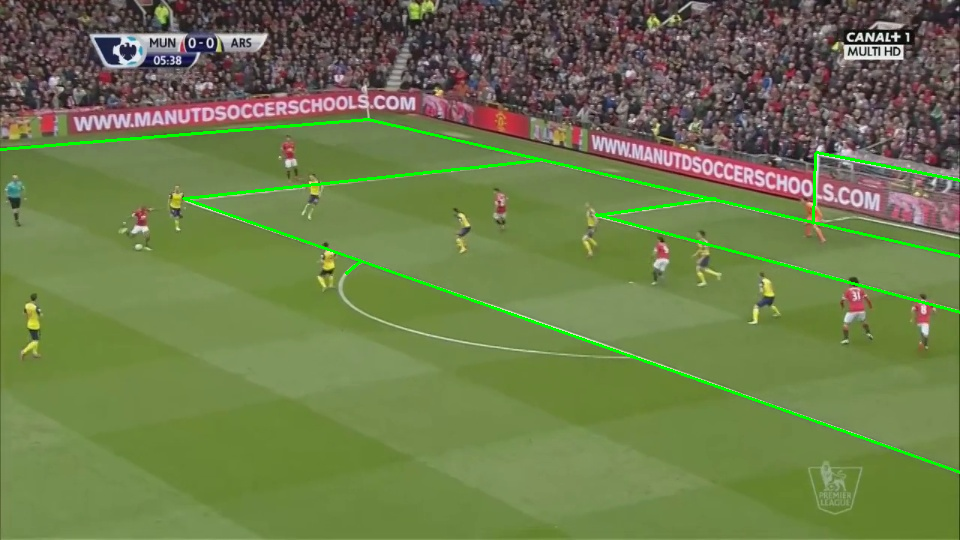

In [50]:
img = cv2.imread('/content/CalibrationData/calibration/test/test/00000.jpg')
cv2_imshow(img)
with open('/content/CalibrationData/calibration/test/test/00000.json', 'r') as json_file:
    json_object = json.load(json_file)

lines = list(json_object.keys())
height, width, channels = img.shape
line_thickness = 2

for line in lines:
  currentLine = json_object[line]
  x1 = int(currentLine[0]['x']*width)
  y1 = int(currentLine[0]['y']*height)
  x2 = int(currentLine[1]['x']*width)
  y2 = int(currentLine[1]['y']*height)
  img = cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), thickness=line_thickness)
cv2_imshow(img)

In [49]:
json_object['Goal right crossbar']

[{'x': 0.850210964679718, 'y': 0.2827500104904175},
 {'x': 1.0, 'y': 0.3333333432674408}]